<a href="https://colab.research.google.com/github/AhmedOssamaAhmed/Diabetes-prediction/blob/main/miningproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("MyDrive")

Drive already mounted at MyDrive; to attempt to forcibly remount, call drive.mount("MyDrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


In [3]:
path = "/content/MyDrive/MyDrive/Copy of Dataset of Diabetes .csv"
df = pd.read_csv(path)

In [4]:
print(df.head())

    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [6]:
df['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

1)we need to make all gender letters caps

In [7]:
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

2) we need to remove spaces from the Class column

we may need to remove the predicted ???

In [8]:
count = 0
for i in df.duplicated(subset=["No_Pation"],keep='last').tolist():
    if i == True:
        count +=1
print(count)

39


ignore ID and no_pation columns

In [9]:
df.drop(['ID','No_Pation'],inplace = True,axis=1)
print(df.head())

  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI CLASS
0      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
1      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0     N
2      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
3      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
4      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0     N


In [10]:
# adjust the values of the Gender Columns
for i in range(len(df)):
    df['Gender'][i] = df['Gender'][i].capitalize()
print(df['Gender'].unique())

<ipython-input-10-2a88d547414b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'][i] = df['Gender'][i].capitalize()


['F' 'M']


In [11]:
# removing spaces in the Class Column
for i in range(len(df)):
    df['CLASS'][i] = df['CLASS'][i].split()[0]
print(df['CLASS'].unique())

<ipython-input-11-3ce93f06a44f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CLASS'][i] = df['CLASS'][i].split()[0]


['N' 'P' 'Y']


# Outliers detection

In [12]:
# detect outliers
df.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [13]:
print(df.loc[df['VLDL'] == 35])

    Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL    BMI CLASS
526      M   66   5.5  73   10.9   9.3  5.1  0.9  6.4  35.0  27.75     Y


## Box plot

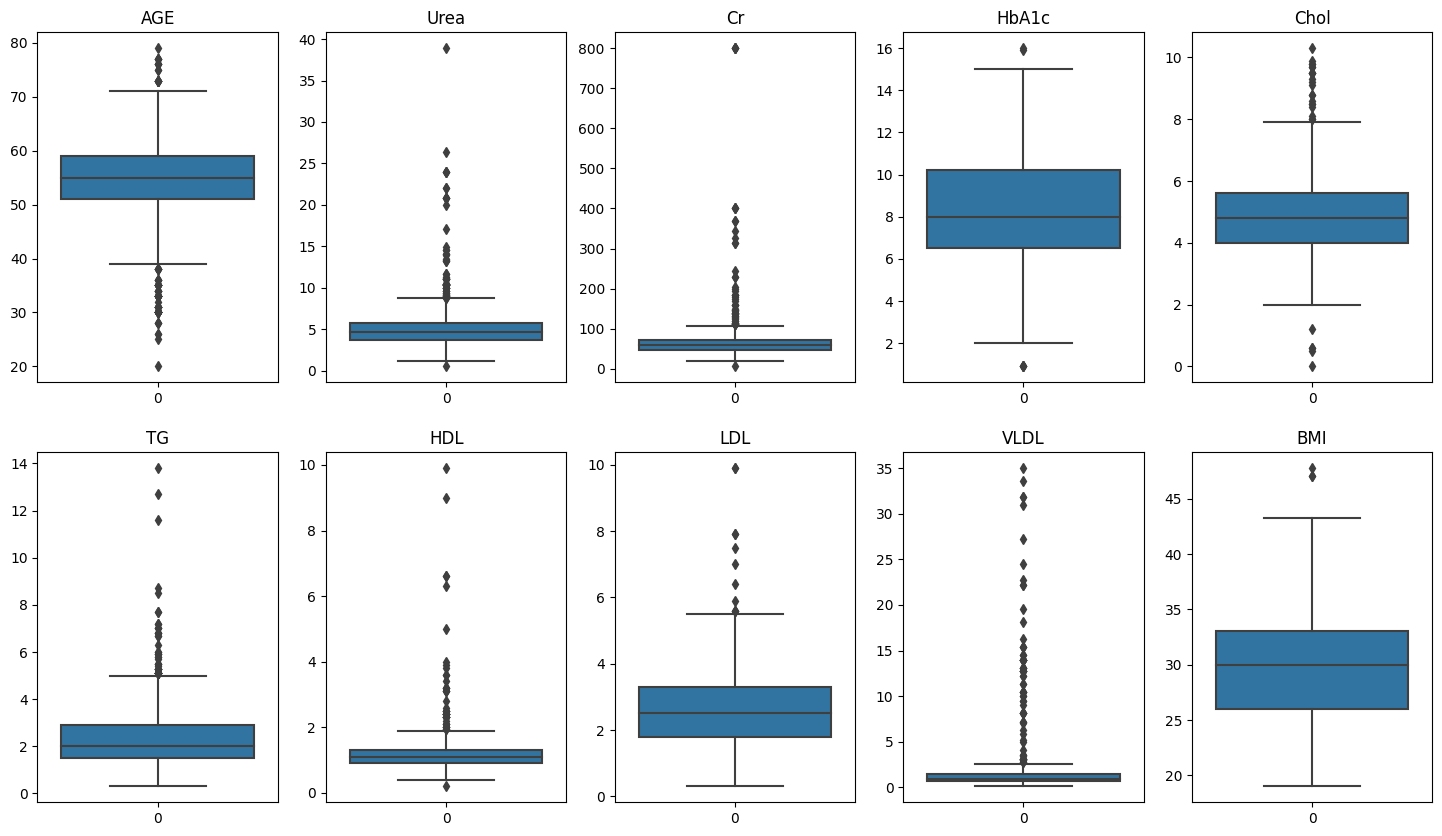

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
row = 0
counter = 0
for i in df.select_dtypes(exclude=['object']).columns.tolist():
    if counter > 4:
        row = 1
        counter = 0 
    sns.boxplot(ax=axes[row,counter],data=df[i])
    axes[row,counter].set_title(i)
    counter +=1

### removing outliers using IQR

In [15]:
# using IQR to remove outliers
df_copy = df.copy()

def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1

    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
            (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

for i in df.select_dtypes(exclude=['object']).columns.tolist():
    if i == df.columns[1]:
        removeOutliers(df, i)
    else:
        removeOutliers(filtered_data, i)
df = filtered_data
df.reset_index(inplace = True)
df.head()

IQR value for column AGE is: 8.0
IQR value for column Urea is: 2.0
IQR value for column Cr is: 25.0
IQR value for column HbA1c is: 3.500000000000001
IQR value for column Chol is: 1.5999999999999996
IQR value for column TG is: 1.4
IQR value for column HDL is: 0.4
IQR value for column LDL is: 1.4999999999999998
IQR value for column VLDL is: 0.7
IQR value for column BMI is: 7.0


,index,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,5,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
1,6,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
2,7,M,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,N
3,13,F,45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23.0,N
4,14,F,50,3.5,39,4.0,4.0,1.5,1.2,2.2,0.7,24.0,N


In [16]:
print(df.shape)
df.drop('index', inplace = True, axis = 1)
df.head()

(667, 13)


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
1,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
2,M,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,N
3,F,45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23.0,N
4,F,50,3.5,39,4.0,4.0,1.5,1.2,2.2,0.7,24.0,N


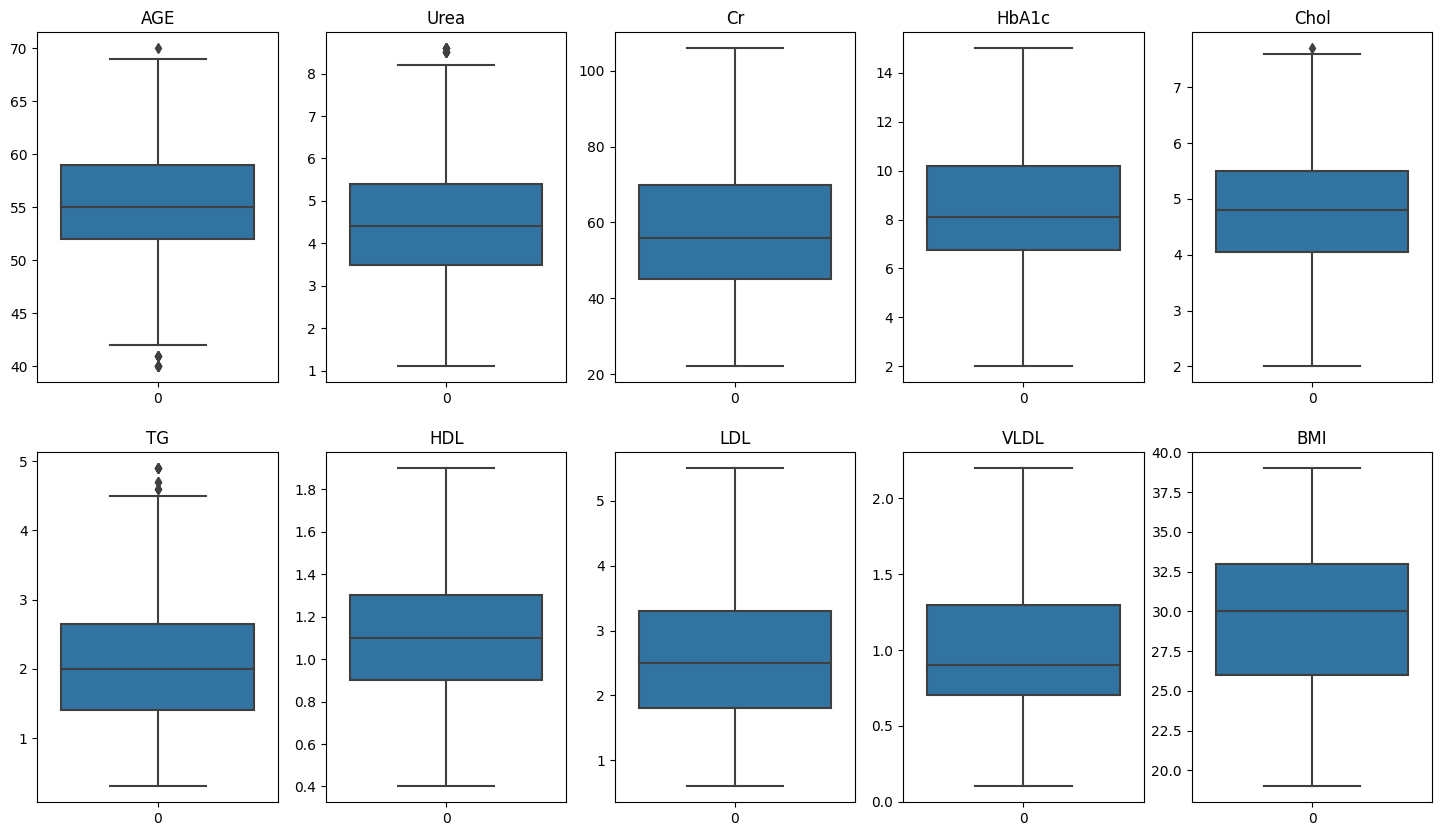

In [17]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))
row = 0
counter = 0
for i in df.select_dtypes(exclude=['object']).columns.tolist():
    if counter > 4:
        row = 1
        counter = 0 
    sns.boxplot(ax=axes[row,counter], data=df[i])
    axes[row,counter].set_title(i)
    counter +=1

In [18]:
df.describe()


,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,54.941529,4.539430,57.973013,8.404888,4.772114,2.128786,1.112039,2.562654,0.999100,29.588606
std,5.378569,1.447008,17.109764,2.514017,1.103517,0.987677,0.318228,0.991890,0.449791,4.549210
min,40.000000,1.100000,22.000000,2.000000,2.000000,0.300000,0.400000,0.600000,0.100000,19.000000
25%,52.000000,3.500000,45.000000,6.750000,4.050000,1.400000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.400000,56.000000,8.100000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.400000,70.000000,10.200000,5.500000,2.650000,1.300000,3.300000,1.300000,33.000000
max,70.000000,8.600000,106.000000,15.000000,7.700000,4.900000,1.900000,5.500000,2.200000,39.000000


333 rows were removed as outliers using IQR

### Removing Outliers using z-score

In [19]:
df_copy.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [20]:
# removing outliers using z-score
from scipy import stats
print(f"shape of data before removing outliers using z-score {df_copy.shape}")
z_scores = stats.zscore(df_copy.select_dtypes(exclude=['object']))

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_copy[filtered_entries]
for j in df_copy.select_dtypes(exclude=['object']).columns.tolist():
    df_copy[j] = new_df[j]
df_copy.dropna(inplace=True)
print(f"shape of data before removing outliers using z-score {df_copy.shape}")


shape of data before removing outliers using z-score (1000, 12)
shape of data before removing outliers using z-score (891, 12)


In [21]:
df_copy.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,53.553311,4.816644,62.063973,8.195466,4.782604,2.219383,1.148350,2.581538,1.275309,29.261706
std,8.542177,1.886865,23.405976,2.523654,1.131262,1.145188,0.386981,1.006042,1.633586,4.748973
min,28.000000,0.500000,6.000000,0.900000,1.200000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.600000,47.000000,6.450000,4.000000,1.400000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,59.000000,8.000000,4.700000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.600000,72.000000,10.000000,5.500000,2.700000,1.300000,3.300000,1.400000,33.000000
max,79.000000,13.300000,203.000000,15.000000,8.600000,6.300000,3.100000,5.600000,12.700000,40.000000


In [22]:
print(df_copy.head())

  Gender   AGE  Urea    Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI CLASS
0      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
2      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
3      F  50.0   4.7  46.0    4.9   4.2  0.9  2.4  1.4   0.5  24.0     N
4      M  33.0   7.1  46.0    4.9   4.9  1.0  0.8  2.0   0.4  21.0     N
5      F  45.0   2.3  24.0    4.0   2.9  1.0  1.0  1.5   0.4  21.0     N


109 rows were removed as outliers using Z-score method

 Comment: More non-sense numbers were removed as outliers using the IQR
 so we will USE IQR to remove outliers

## Correlation Matrix
using pearson correlation

<ipython-input-23-2bb67c47a738>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method='pearson')


<Axes: >

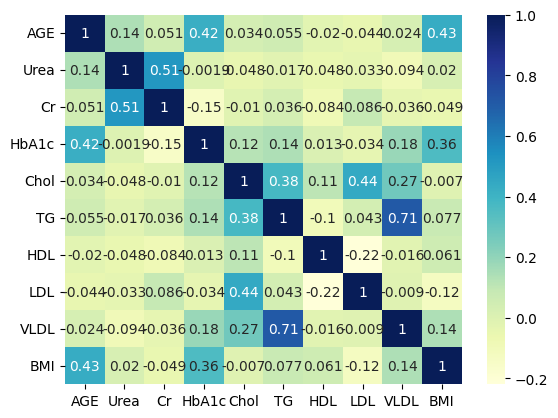

In [23]:
correlation = df.corr(method='pearson')
sns.heatmap(correlation, cmap="YlGnBu", annot=True)

the highest correlation is between VLDL and TG columns about 71 % 
therfor no need to drop any 

scatter plot


In [24]:
df.loc[1].tolist()

['F', 50, 2.0, 50, 4.0, 3.6, 1.3, 0.9, 2.1, 0.6, 24.0, 'N']

['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']


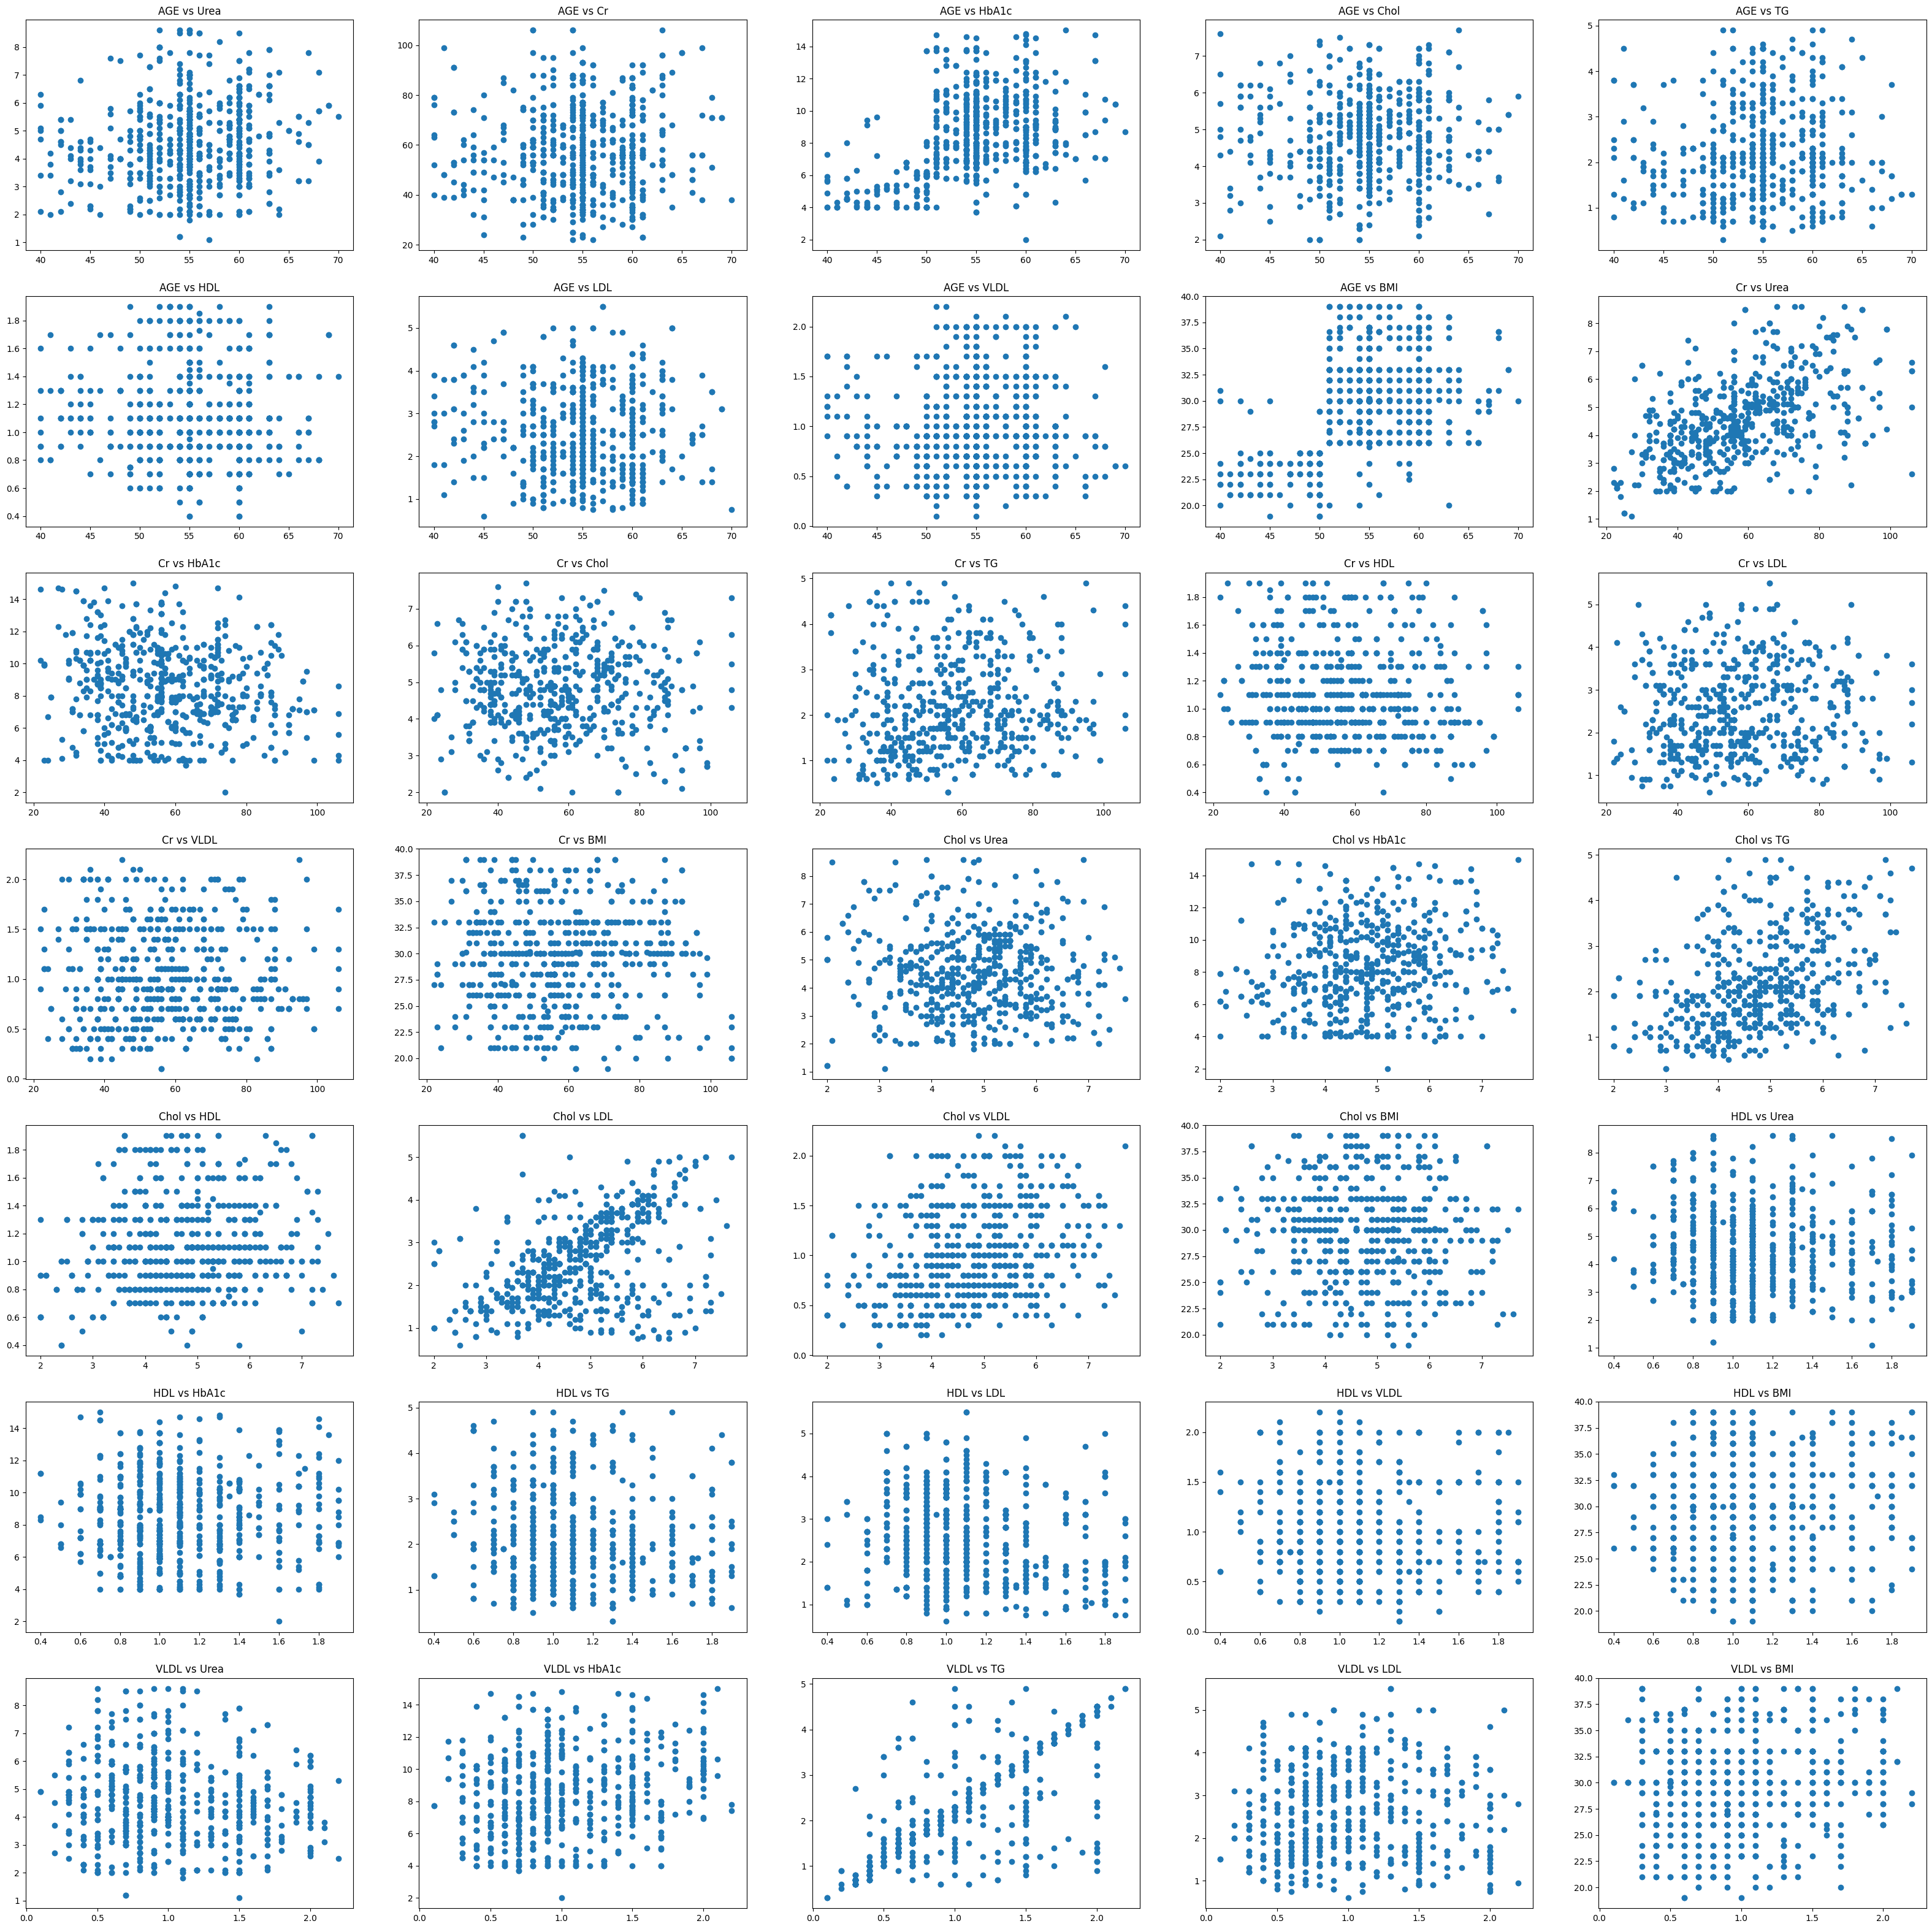

In [25]:
fig, axes = plt.subplots(7, 5, figsize=(40, 40))
column_names = df.select_dtypes(exclude=['object']).columns.tolist()
print(column_names)
columns = 0
rows = 0
for i in column_names:
    new_names = column_names
    new_names.remove(i)
    for j in new_names:
        if columns > 4:
            columns = 0
            rows += 1
        axes[rows,columns].scatter(x=df[i], y=df[j])
        # axes[rows,columns].xlabel(i)
        # axes[rows,columns].ylabel(j)
        axes[rows,columns].set_title(f"{i} vs {j}")
        columns += 1

# plt.scatter(df["AGE"],df["BMI"])
# plt.xlabel("AGE")
# plt.ylabel("BMI")

Conclusion : 

## ENCODING

In [26]:
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
1,F,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
2,M,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,N
3,F,45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23.0,N
4,F,50,3.5,39,4.0,4.0,1.5,1.2,2.2,0.7,24.0,N


In [27]:
encoding = LabelEncoder()
for column in df.select_dtypes(include=['object', 'bool']).columns.tolist():
    df[column] = encoding.fit_transform(df[column])

In [28]:
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
1,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0
2,1,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,0
3,0,45,4.6,54,5.1,4.2,1.7,1.2,2.2,0.8,23.0,0
4,0,50,3.5,39,4.0,4.0,1.5,1.2,2.2,0.7,24.0,0


## split test - Train

In [29]:
x = df.loc[:,'Gender':'BMI']
y = df.loc[:,'CLASS']
print(x)
print(y)

     Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI
0         0   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4  21.0
1         0   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6  24.0
2         1   48   4.7  47    4.0   2.9  0.8  0.9  1.6   0.4  24.0
3         0   45   4.6  54    5.1   4.2  1.7  1.2  2.2   0.8  23.0
4         0   50   3.5  39    4.0   4.0  1.5  1.2  2.2   0.7  24.0
..      ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   ...
662       1   62   6.3  82    6.7   5.3  2.0  1.0  3.5   0.9  30.1
663       0   57   4.1  70    9.3   5.3  3.3  1.0  1.4   1.3  29.0
664       0   55   4.1  34   13.9   5.4  1.6  1.6  3.1   0.7  33.0
665       1   55   3.1  39    8.5   5.0  2.5  1.9  2.9   0.7  27.0
666       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7  33.0

[667 rows x 11 columns]
0      0
1      0
2      0
3      0
4      0
      ..
662    2
663    2
664    2
665    2
666    2
Name: CLASS, Length: 667, dtype: int64


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Feature Selection

<BarContainer object of 11 artists>

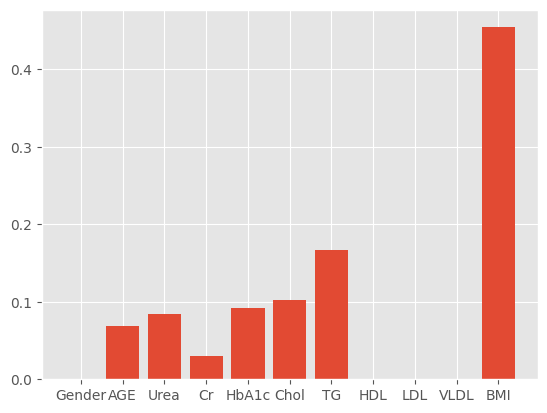

In [31]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,Y_train)
plt.style.use('ggplot')
plt.bar(DT.feature_names_in_, DT.feature_importances_)

Comment: As shown some features has very low or non importance at all so we may drop them to increase the accuracy

lets see the accuracy of the decision tree before and after removing these features

In [32]:
from sklearn.metrics import accuracy_score
# accuracy before 
print("accuracy before removing (Gender , LDL , VLDL) columns ")
train_predc_before = DT.predict(X_train)
test_predc_before = DT.predict(X_test)
print(f"the training accuracy before removing the features is {accuracy_score(Y_train,train_predc_before)*100} %")
print(f"the testing accuracy before removing the features is {accuracy_score(Y_test,test_predc_before)*100} %")
print("------------------------------------------------------------------------------------------------------")

# accuracy after removing (Gender , LDL , VLDL)
print("accuracy after removing (Gender , LDL , VLDL) columns ")
updated_x_train = X_train.drop(['Gender', 'LDL','VLDL'], axis=1)
updated_x_test = X_test.drop(['Gender', 'LDL','VLDL'], axis=1)

DT_updated = DecisionTreeClassifier()
DT_updated.fit(updated_x_train,Y_train)
train_predc_after = DT_updated.predict(updated_x_train)
test_predc_after = DT_updated.predict(updated_x_test)
print(f"the training accuracy after removing the features is {accuracy_score(Y_train,train_predc_after)*100} %")
print(f"the testing accuracy after removing the features is {accuracy_score(Y_test,test_predc_after)*100} %")


accuracy before removing (Gender , LDL , VLDL) columns 
the training accuracy before removing the features is 100.0 %
the testing accuracy before removing the features is 96.26865671641791 %
------------------------------------------------------------------------------------------------------
accuracy after removing (Gender , LDL , VLDL) columns 
the training accuracy after removing the features is 100.0 %
the testing accuracy after removing the features is 97.01492537313433 %


as seen the testing accuracy has slightly increased , so removing these features was right

lets validate the new feature importance

<BarContainer object of 8 artists>

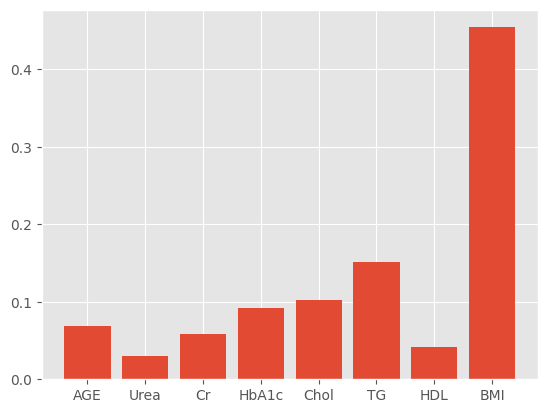

In [33]:
plt.bar(DT_updated.feature_names_in_, DT_updated.feature_importances_)

HDL and Urea has a very low importance so lets check for any differences if these columns are dropped

In [34]:
# dropping the (HDL , Urea) columns
new_updated_x_train = updated_x_train.drop(['HDL', 'Urea'], axis=1)
new_updated_x_test = updated_x_test.drop(['HDL', 'Urea'], axis=1)

new_DT_updated = DecisionTreeClassifier()
new_DT_updated.fit(new_updated_x_train,Y_train)
train_predc_after = new_DT_updated.predict(new_updated_x_train)
test_predc_after = new_DT_updated.predict(new_updated_x_test)
print("accuracy after removing HDL and Urea")
print(f"the training accuracy after removing these features is {accuracy_score(Y_train,train_predc_after)*100} %")
print(f"the testing accuracy after removing these features is {accuracy_score(Y_test,test_predc_after)*100} %")

accuracy after removing HDL and Urea
the training accuracy after removing these features is 100.0 %
the testing accuracy after removing these features is 97.01492537313433 %


same accuracy so no need for these column to reduce the computational complexity 

## data Normalization

their is no need for data normalization as the variation of the columns' ranges isn't high. but lets try normalizing the data and check for any difference

first we will normalize the original data before the feature selection and check for the accuracy

In [35]:
from sklearn.preprocessing import MinMaxScaler
# normalizing non-categorical features only
normalized_x_train = X_train.copy()
normalized_x_test = X_test.copy()
norm = MinMaxScaler(feature_range=(0,1))
normalized_x_train.loc[:,'AGE':'BMI'] = norm.fit_transform(normalized_x_train.loc[:,'AGE':'BMI'])
normalized_x_test.loc[:,'AGE':'BMI'] = norm.fit_transform(normalized_x_test.loc[:,'AGE':'BMI'])
normalized_x_train.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
234,0,0.466667,0.426667,0.392857,0.646018,0.245614,0.586957,0.333333,0.591837,0.380952,0.60
398,0,0.500000,0.506667,0.488095,0.000000,0.719298,0.282609,0.666667,0.693878,0.285714,0.35
278,0,0.500000,0.213333,0.369048,0.318584,0.368421,0.652174,0.333333,0.306122,0.666667,0.50
61,1,0.333333,0.520000,0.619048,0.221239,0.000000,0.108696,0.133333,0.081633,0.142857,0.25
145,0,0.400000,0.653333,0.642857,0.247788,0.122807,0.195652,0.266667,0.163265,0.190476,0.60


now lets train Decision tree classifier and compare accuracy and important feauters

the training accuracy after normalizing is 100.0 %
the testing accuracy after normalizing is 88.05970149253731 %


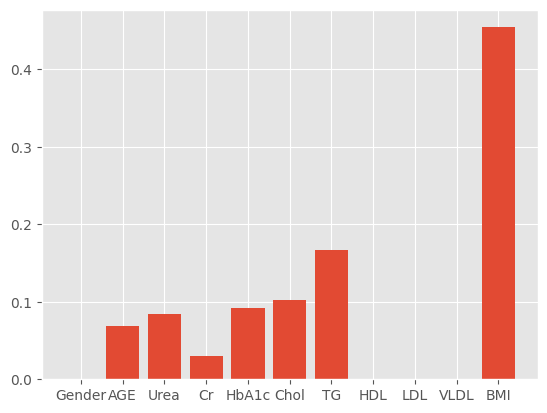

In [36]:
DT_normalized = DecisionTreeClassifier()
DT_normalized.fit(normalized_x_train,Y_train)
plt.style.use('ggplot')
plt.bar(DT_normalized.feature_names_in_, DT.feature_importances_)
print(f"the training accuracy after normalizing is {accuracy_score(Y_train,DT_normalized.predict(normalized_x_train))*100} %")
print(f"the testing accuracy after normalizing is {accuracy_score(Y_test,DT_normalized.predict(normalized_x_test))*100} %")

Comment : same feature importance but with lower testing accuracy so no need for normalizing the data

In [37]:
# so the final data after feature selection and without normalizing is 
x_train_final = new_updated_x_train.copy()
x_test_final = new_updated_x_test.copy()
x_train_final.head()

,AGE,Cr,HbA1c,Chol,TG,BMI
234,54,55,11.0,3.4,3.0,31.0
398,55,63,3.7,6.1,1.6,26.0
278,55,53,7.3,4.1,3.3,29.0
61,50,74,6.2,2.0,0.8,24.0
145,52,76,6.5,2.7,1.2,31.0


# observations
1 ) What percentage of younger people are prone to be diagnosed with diabetes disease?
 
2 ) Are women more prone to diabetes, or is it the other way? ….  etc.


will assume the younger people are below 50 

In [62]:
younger = df[df['AGE'] < 50 ]
percentage_diabitic_younger = younger[younger['CLASS'] != 0].shape[0]*100 / younger.shape[0]
percentage_diabitic_younger


55.55555555555556

1)
55% of the young people are prone to be diabitic 

however if we assummed that young people are below 30 therfor the percetage will be 0 because the dataset does not contain cases with age less that 40

2) After doing feature selection we discovered that the gender doesnt affect in being diabetic or not .... so we can't tell that men or women are more prone to be diabetic

# some machine learning models

the highest testing accuracy reached was around 97% , so will try another models trying the increase the accuracy

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

#Gaussian naiive bayes

In [39]:
GB = GaussianNB()
GB.fit(x_train_final,Y_train)
GB_train_accuracy = accuracy_score(Y_train,GB.predict(x_train_final))
GB_test_accuracy = accuracy_score(Y_test,GB.predict(x_test_final))
print(f"the Gauusian NB training accuracy is {GB_train_accuracy*100} %")
print(f"the Gauusian NB testing accuracy is {GB_test_accuracy*100} %")


the Gauusian NB training accuracy is 96.43527204502814 %
the Gauusian NB testing accuracy is 98.50746268656717 %


# KNN with hyper parameter tuning for the best accuracy

In [40]:
def accuracy_change(data_manhattan, data_euclidean, title):
    x = list(data_manhattan.keys())
    y = list(data_manhattan.values())
    x2 = list(data_euclidean.keys())
    y2 = list(data_euclidean.values())
    plt.plot(x, y, label="manhattan")
    plt.plot(x2, y2, label="euclidean")
    plt.xlabel("k")
    plt.ylabel("accuracy")
    plt.title(title)
    plt.legend()
    plt.show()


the validation accuracy for k = 2 using Manhattan distance is 0.8888888888888888
the validation accuracy for k = 3 using Manhattan distance is 0.8518518518518519
the validation accuracy for k = 4 using Manhattan distance is 0.8518518518518519
the validation accuracy for k = 5 using Manhattan distance is 0.8518518518518519
the validation accuracy for k = 6 using Manhattan distance is 0.8888888888888888
the validation accuracy for k = 7 using Manhattan distance is 0.8888888888888888
the validation accuracy for k = 8 using Manhattan distance is 0.8888888888888888
the validation accuracy for k = 9 using Manhattan distance is 0.8888888888888888
the validation accuracy for k = 2 using Euclidean distance is 0.8518518518518519
the validation accuracy for k = 3 using Euclidean distance is 0.8148148148148148
the validation accuracy for k = 4 using Euclidean distance is 0.8148148148148148
the validation accuracy for k = 5 using Euclidean distance is 0.8148148148148148
the validation accuracy for 

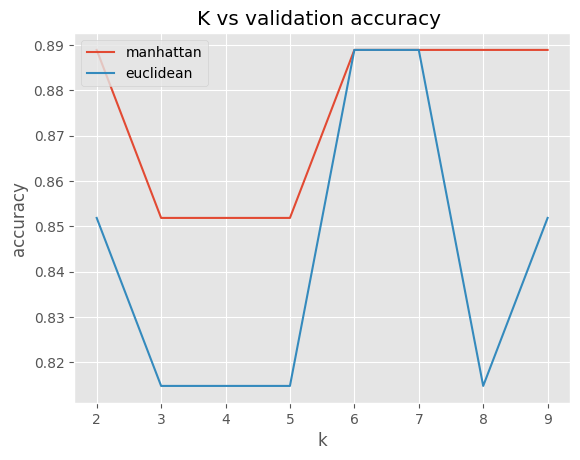

In [41]:
# split test data into test and validation
x_test_final, x_validation_final, Y_test, Y_validation = train_test_split(x_test_final, Y_test, test_size=0.2, random_state=42)

distance_list = [1, 2]
best_manhattan_k = {}
best_euclidean_k = {}
for dist in distance_list:
    k = {}
    for i in range(2, 10):
        KNN = KNeighborsClassifier(n_neighbors=i, p=dist)
        KNN.fit(x_train_final, Y_train)
        KNN_validation_accuracy = accuracy_score(Y_validation, KNN.predict(x_validation_final))
        if dist == distance_list[0]:
            distance_name = "Manhattan"
        else:
            distance_name = "Euclidean"
        print(
            f"the validation accuracy for k = {i} using {distance_name} distance is {KNN_validation_accuracy}")

        k[i] = KNN_validation_accuracy

    if dist == distance_list[0]:
        best_manhattan_k = k
    else:
        if dist == distance_list[1]:
            best_euclidean_k = k

bestK = max(best_euclidean_k, key=best_euclidean_k.get)
accuracy_change(best_manhattan_k, best_euclidean_k, "K vs validation accuracy ")



In [43]:
# using euclidean distance with best k
print(f"best k is {bestK} using manhattan distance or eculidean")
KNN = KNeighborsClassifier(n_neighbors=bestK)
KNN.fit(x_train_final, Y_train)
KNN_train_accuracy = accuracy_score(Y_train, KNN.predict(x_train_final))
KNN_validation_accuracy = accuracy_score(Y_validation, KNN.predict(x_validation_final))
KNN_test_accuracy = accuracy_score(Y_test, KNN.predict(x_test_final))
print(f"the accuracy for k = {bestK} for the KNN classifier is ")
print(f"the training accuracy is {KNN_train_accuracy * 100} %")
print(f"the validation accuracy is {KNN_validation_accuracy * 100} %")
print(f"the test accuracy is {KNN_test_accuracy * 100} %")
print("------------------------------------------------------------------------")

best k is 6 using manhattan distance or eculidean
the accuracy of the digits dataset for k = 6 for the KNN classifier is 
the training accuracy is 93.62101313320825 %
the validation accuracy is 88.88888888888889 %
the test accuracy is 91.58878504672897 %
------------------------------------------------------------------------


# SVM

In [44]:
SVM = SVC(degree=2)
SVM.fit(x_train_final, Y_train)
SVM_validation_accuracy = accuracy_score(Y_validation, SVM.predict(x_validation_final))
SVM_training_accuracy = accuracy_score(Y_train, SVM.predict(x_train_final))
SVM_testing_accuracy = accuracy_score(Y_test, SVM.predict(x_test_final))
print(f"the training accuracy is {SVM_training_accuracy * 100} %")
print(f"the validation accuracy is {SVM_validation_accuracy * 100} %")
print(f"the test accuracy is {SVM_testing_accuracy * 100} %")
print("------------------------------------------------------------------------")

the training accuracy is 88.55534709193246 %
the validation accuracy is 85.18518518518519 %
the test accuracy is 80.37383177570094 %
------------------------------------------------------------------------


# MLP

In [45]:
mlp = MLPClassifier(
                hidden_layer_sizes=(350,),
                activation='relu',
                solver='adam',
                learning_rate='adaptive',
                learning_rate_init=0.01,
                alpha=0.001,
                verbose=False)
mlp.fit(x_train_final,Y_train)
mlp_validation_accuracy = accuracy_score(Y_validation, mlp.predict(x_validation_final))
mlp_training_accuracy = accuracy_score(Y_train, mlp.predict(x_train_final))
mlp_testing_accuracy = accuracy_score(Y_test, mlp.predict(x_test_final))
print(f"the training accuracy is {mlp_training_accuracy * 100} %")
print(f"the validation accuracy is {mlp_validation_accuracy * 100} %")
print(f"the test accuracy is {mlp_testing_accuracy * 100} %")
print("------------------------------------------------------------------------")

the training accuracy is 91.18198874296435 %
the validation accuracy is 85.18518518518519 %
the test accuracy is 82.2429906542056 %
------------------------------------------------------------------------


# Comment: the highest accuracy was for the Naive bayes classifier 